## Pymaceuticals

In [1]:
# Dependencies and Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Raw data file(s)
csv_file = ["Resources/mouse_drug_data.csv", "Resources/clinicaltrial_data.csv"]

# Read data file(s) and store into data frame(s)
clinical_trial_data = pd.read_csv(csv_file[0])
mouse_drug_data = pd.read_csv(csv_file[1])

In [2]:
# Clean/Prepare the data
clinical_trial_drug_data = pd.merge(clinical_trial_data, mouse_drug_data)
clinical_trial_drug_data.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Treatment Response: Volume Changes

In [ ]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
tumor_volume_avg = clinical_trial_drug_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"].rename("Average Tumor Volume (mm3)")
tumor_volume_mean = pd.DataFrame({"Average Tumor Volume (mm3)":tumor_volume_avg}).round(2)

drug_names = tumor_volume_mean.index.get_level_values(0).drop_duplicates()
timepoints = tumor_volume_mean.index.get_level_values(1).drop_duplicates()

In [4]:
tumor_volume_mean = tumor_volume_mean.reset_index()
tumor_volume_mean_data = tumor_volume_mean.pivot(index="Timepoint", columns="Drug")["Average Tumor Volume (mm3)"]

# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_sem  = clinical_trial_drug_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"].rename("Standard Error")
tumor_volume_standard_error = pd.DataFrame({"Standard Error":tumor_volume_sem}).round(2)

tumor_volume_standard_error = tumor_volume_standard_error.reset_index()
tumor_volume_standard_error_data = tumor_volume_standard_error.pivot(index="Timepoint", columns="Drug")["Standard Error"]

In [5]:
tumor_volume_mean_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00,45.00
5,44.27,46.50,47.06,47.39,46.80,47.13,47.25,43.94,47.53,46.85
10,43.08,48.29,49.40,49.58,48.69,49.42,49.10,42.53,49.46,48.69
15,42.06,50.09,51.30,52.40,50.93,51.36,51.07,41.50,51.53,50.78
20,40.72,52.16,53.20,54.92,53.64,54.36,53.35,40.24,54.07,53.17
25,39.94,54.29,55.72,57.68,56.73,57.48,55.50,38.97,56.17,55.43
30,38.77,56.77,58.30,60.99,59.56,59.81,58.20,38.70,59.83,57.71
35,37.82,58.83,60.74,63.37,62.69,62.42,60.35,37.45,62.44,60.09
40,36.96,61.47,63.16,66.07,65.60,65.05,63.05,36.57,65.36,62.92


In [24]:
tumor_volume_standard_error_data

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.45,0.16,0.24,0.26,0.20,0.22,0.23,0.48,0.24,0.19
10,0.70,0.24,0.28,0.36,0.32,0.40,0.38,0.72,0.43,0.26
15,0.84,0.33,0.36,0.58,0.44,0.61,0.47,0.77,0.49,0.37
20,0.91,0.36,0.48,0.73,0.60,0.84,0.56,0.79,0.62,0.53
25,0.88,0.44,0.55,0.76,0.81,1.03,0.58,0.75,0.74,0.60
30,0.93,0.49,0.63,0.93,0.98,1.22,0.75,0.86,0.90,0.80
35,1.05,0.69,0.98,1.13,1.01,1.29,1.08,0.97,1.00,0.88
40,1.22,0.71,1.06,1.16,1.12,1.37,1.56,1.13,1.41,1.00


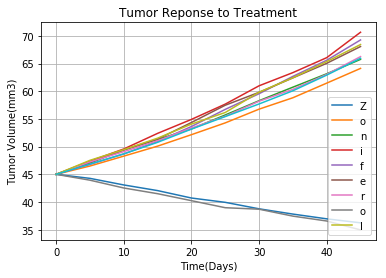

In [25]:
# Generate the Plot (with Error Bars)
x_axis = tumor_volume_mean.index.get_level_values(1)

# Plot the Figure
for drug in drug_names:
    plt.plot(tumor_volume_mean_data[drug])
    plt.legend(drug)

    
plt.title("Tumor Reponse to Treatment")
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Time(Days)")
plt.grid(True)

# Display the Figure
plt.show()

### Treatment Response: Metastatic Changes

### Treatment Survival Rate

### Summary of Treatments by Volume

### Observable Trends
>Over the trial, Capomulin would be the recommend drug for treatment as it had the highest rate of survival lowest mestatic response and the most effective response to treatment.

>Oddly, the drug Ketapril and the Placebo show the same statistics in all three categories. It is a possible conclusion that both drugs share similar components.

>Propriva would be the worst.  It did little to no good in any of the categories for treatment.